In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

## Data collection and processing 

In [94]:
# loading the csv data to a pandas Datafram
gold_data = pd.read_csv("C:\\Users\\UTKARSH TIWARI\\Downloads\\gld_price_data.csv")

In [95]:
# print first 5 rows of dataframs
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [96]:
# wanta to print the last 5 rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [97]:
gold_data.shape

(2290, 6)

In [98]:
# getting some basic infor about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [99]:
#checking the number of the null value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [100]:
#getting the statical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [101]:
# for checking the positive and negative aspects of the correaltion between the data 
correlation= gold_data.corr

In [102]:
# correlation is compared by using the heatmaps 
# plt.figure(figsize=(12,10))
#sns.heatmap(correlation,annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
#print(correlation['GLD'])

<Axes: xlabel='GLD', ylabel='Count'>

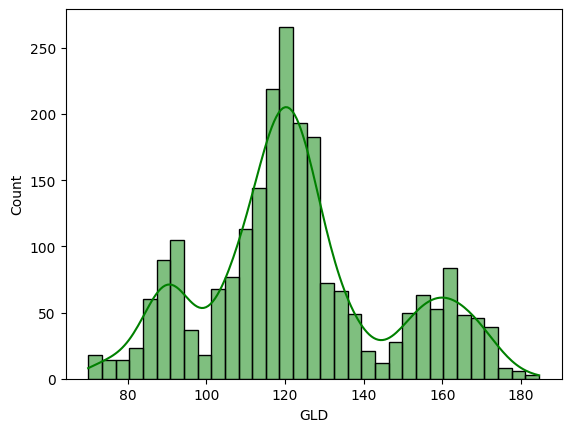

In [106]:
sns.histplot(gold_data['GLD'], color="green", kde=True)

In [107]:
x=gold_data.drop(['GLD','Date'],axis=1)
y=gold_data['GLD']

In [108]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [109]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# splitting into trainning data and test data 

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# model trainning random forest reggresssor 

In [111]:
regressor = RandomForestRegressor(n_estimators=100)

In [112]:
# trainning the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

## model evaluation 


In [113]:
test_data_prediction = regressor.predict(x_test)

In [115]:
print(test_data_prediction)

[168.66319905  82.10479984 115.78970016 127.64310055 120.67960121
 154.82489727 150.09259836 126.13220079 117.37249886 125.9309005
 116.73380104 171.2955008  141.6589985  167.89039813 114.86180016
 117.26840034 138.75580276 170.36430089 159.84910333 157.89370009
 155.1442004  125.46170029 175.44229975 156.86430331 125.28540048
  93.74809985  76.77050079 120.37919994 119.01199925 167.55729919
  87.9771002  125.10629999  91.21170096 117.56520051 121.13729899
 136.02260093 115.60450145 115.19850059 146.99169965 107.2497007
 104.35520254  87.17819792 126.49800095 118.00359994 152.15279925
 119.71370011 108.27159994 107.87879827  93.17100061 127.16899741
  75.11670016 113.64139909 121.1101002  111.19649907 119.03859931
 121.22089948 160.00630058 168.10490158 147.00149734  85.98329878
  94.21760019  86.89039846  90.60480031 118.94490074 126.46420061
 127.48860057 169.22479963 122.28699939 117.4777989   98.7569004
 168.01670052 143.10869845 132.13130279 121.24820219 121.0664994
 119.59820066 

In [116]:
# R squared error it means we  are printing the error betweent the pridicted data and test data 
error_score=metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.9893167330251698


# comparing the actual values and predicted values 


In [117]:
y_test =list(y_test)

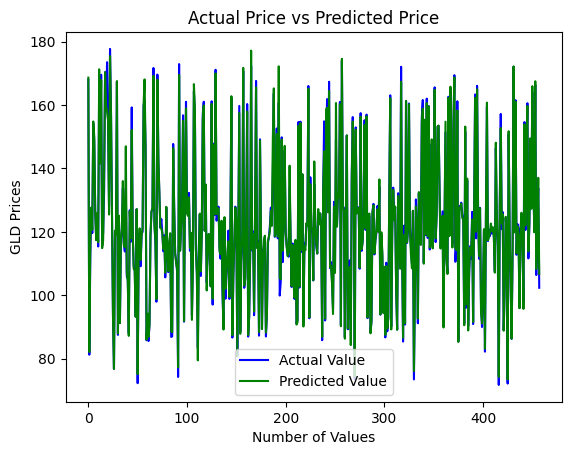

In [ ]:
plt.plot(y_test, color='blue', label='Actual Value')  # Corrected 'lable' to 'label'
plt.plot(test_data_prediction, color='green', label='Predicted Value')  # Added missing 'label'
plt.title('Actual Price vs Predicted Price')  # Corrected spelling in 'price'
plt.xlabel('Number of Values')  # Capitalized the first letter
plt.ylabel('GLD Prices')  # Capitalized for consistency
plt.legend()  # Display the legend
plt.show()  # Show the plot
